# Plots data

In [1]:
require(ggplot2)
require(reshape2)

Loading required package: ggplot2
Loading required package: reshape2


The script preprocess.R load and preprocess data. Running it results in finding the preprocessed data in the global environment.

In [9]:
path = '/Users/davide/Documents/universita/tesi/src/preprocess'
setwd(path)
source('preprocess.R')

[1] "keep_only_pharmacological_events: selected 625388 rows out of 1333954"
[1] "keep_only_ACE_drugs: selected 78039 rows out of 625388"
[1] "keep_patients_first_discharge_before_date: selected 77579 rows out of 78039"
[1] "keep_patients_survived_minimum_period 77269 rows out of 77579"
[1] "keep_only_follow_up_events 22056 rows out of 77269"


In [33]:
print(paste('The cohort is made of',length(unique(sel_df$COD_REG)),'patients'))

[1] "The cohort is made of 2916 patients"


In [10]:
# global environment
ls()

[1] "add_relative_time"                        
 [2] "compute_counting_processes"               
 [3] "day_max"                                  
 [4] "df"                                       
 [5] "keep_only_ACE_drugs"                      
 [6] "keep_only_follow_up_events"               
 [7] "keep_only_pharmacological_events"         
 [8] "keep_only_useful_columns"                 
 [9] "keep_patients_first_discharge_before_date"
[10] "keep_patients_survived_minimum_period"    
[11] "max_date_first_discharge"                 
[12] "melt_process_patient"                     
[13] "melted_processes"                         
[14] "months_follow_up"                         
[15] "path"                                     
[16] "processes"                                
[17] "sel_df"                                   
[18] "selected_patients"                        
[19] "subset_process"                           
[20] "verbose"

# Counting Processes

Let's plot the realizations of the counting process for a sample of patients in the follow-up period. In this case, N(t) is the cumulative sum in time of the qt_press_sum variable

In [12]:
head(melted_processes)

pharma_process,time,patient,sex,min_age,outcome,survival_time
0,0,10000717,M,72,TRONCATO,706
0,1,10000717,M,72,TRONCATO,706
0,2,10000717,M,72,TRONCATO,706
0,3,10000717,M,72,TRONCATO,706
0,4,10000717,M,72,TRONCATO,706
0,5,10000717,M,72,TRONCATO,706


In [36]:
# select subset of patients
selected_patients = sample(unique(melted_processes$patient),100)
subset_process = melted_processes[which(melted_processes$patient %in% selected_patients)]

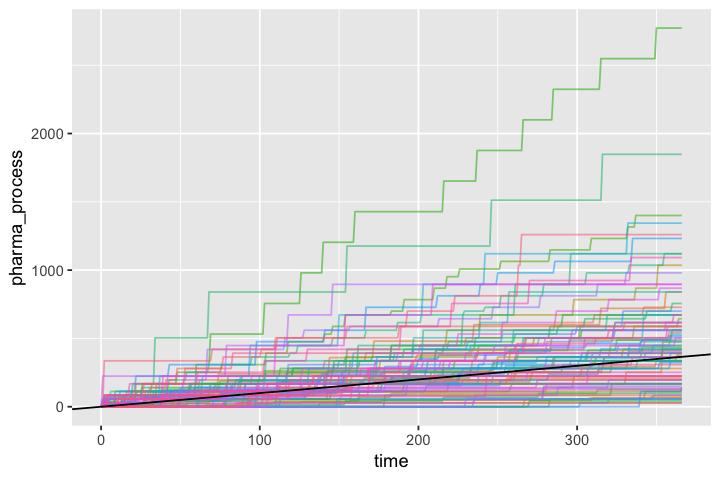

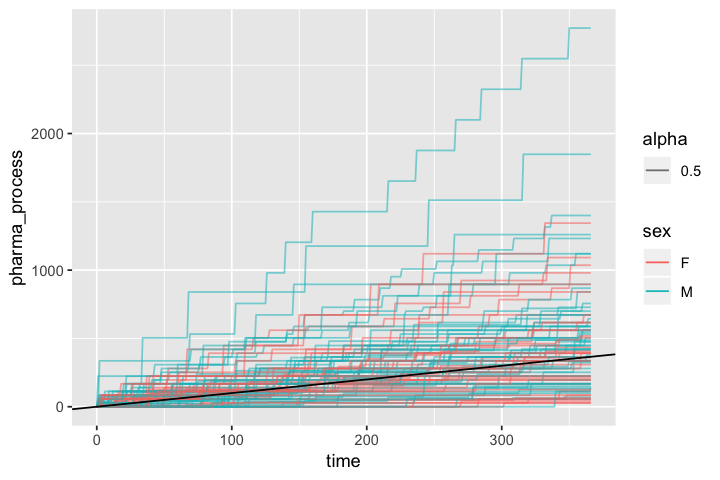

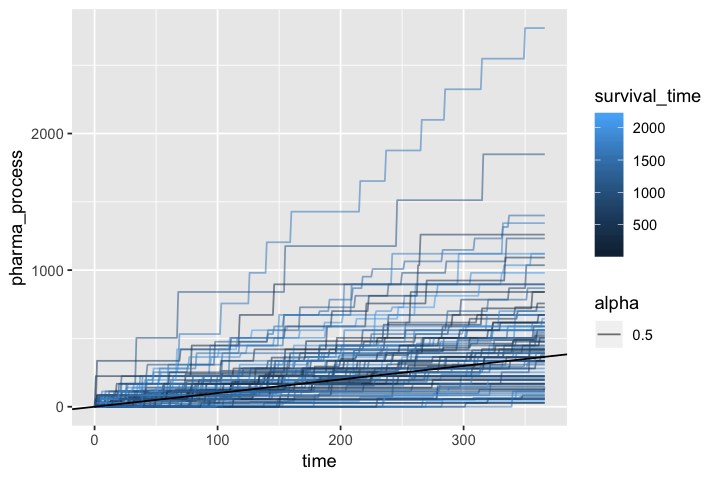

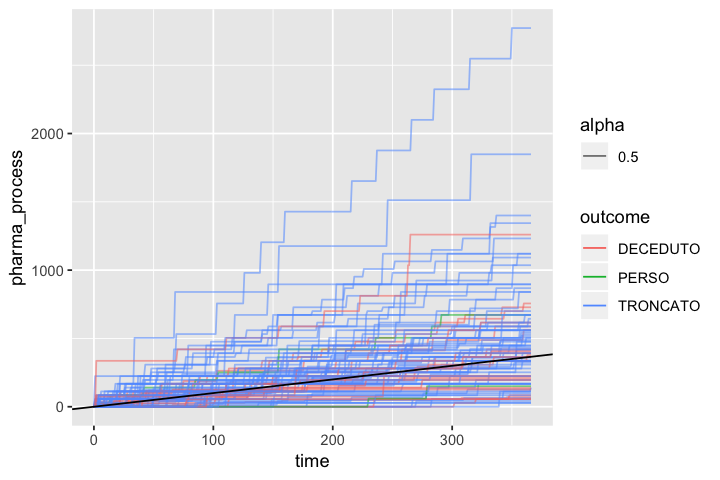

In [37]:
options(repr.plot.width=6, repr.plot.height=4)

ggplot(subset_process, aes(x= time, y=pharma_process, group = factor(patient), color=factor(patient),alpha = 0.1)) +
  geom_line() +
  geom_abline(slope = 1,color = 'black') +
  theme(legend.position="none")

ggplot(subset_process, aes(x= time, y=pharma_process, group = factor(patient), color=sex, alpha = 0.5)) +
  geom_line() +
  geom_abline(slope = 1,color = 'black') 

ggplot(subset_process, aes(x= time, y=pharma_process, group = factor(patient), color=survival_time, alpha = 0.5)) +
  geom_line() +
  geom_abline(slope = 1,color = 'black') 

ggplot(subset_process, aes(x= time, y=pharma_process, group = factor(patient), color=outcome, alpha = 0.5)) +
  geom_line() +
  geom_abline(slope = 1,color = 'black') 